In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import netCDF4
import xarray as xr
import pickle 

In [2]:
#read netcdf4 file with simulation
def read_sim(file_in): 

    f = netCDF4.Dataset(file_in)

    #read jacobian and data into jac and meas, respectively. Also get z (#cases,), m (measurent), n (param) lengths
    jac_all=np.asarray(f.variables['K_Jac'])
    meas=np.asarray(f.variables['rhot'])
    waveln=np.asarray(f.variables['wavelength'])
    g=jac_all.shape
    z_len=g[0]
    m_len=g[1]
    n_len=g[2]

    #read the simulation specific parameters into a dataframe
    df = pd.DataFrame({'Windspeed(m_s)': np.asarray(f.variables['Windspeed(m_s)']),
                       'Humidity(%)': np.asarray(f.variables['Humidity(%)']),
                       'FMF': np.asarray(f.variables['FMF']),
                       'AOD(869)': np.asarray(f.variables['AOD(869)']),
                       'chla(mg_m3)': np.asarray(f.variables['chla(mg_m3)']),
                       'plastic_fraction': np.asarray(f.variables['plastic_fraction']), 
                       'solz': np.asarray(f.variables['solz']),     
                       'relaz': np.asarray(f.variables['relaz']),  
                       'senz': np.asarray(f.variables['senz']),  
                      })

    #close netcdf file
    f.close()

    return jac_all, meas, waveln, g, df

In [3]:
#input/output and other specifics
#set file tags:
tag_longdescription="Simulation for nadir viewing, 13 channel sensor [412, 443, 469, 488, 531, 547, 555, 645, 667, 678, 748, 859, 869] nm"

tag_BF='Multispectral, Biofouled: ' 
filetag_BF='SQOOP_Amir_v4'
file_in_BF='simulations/Amir/plastics_toa_simulations_modisa_permutations_v4.nc' #biofouled case
outname_BF='data/SQOOP_Amir_v4'

tag_NB='Multispectral, Non-Biofouled: ' 
filetag_NB='SQOOP_Amir_v5NB'
file_in_NB='simulations/Amir/plastics_toa_simulations_modisa_permutations_v5_non_biofouled.nc'
outname_NB='data/SQOOP_Amir_v5NB'


In [4]:
jac_all_BF, meas_BF, waveln_BF, g_BF, df_BF = read_sim(file_in_BF)
jac_all_NB, meas_NB, waveln_NB, g_NB, df_NB = read_sim(file_in_NB)

print(np.shape(meas_BF))


(131220, 13)


In [5]:
df_BF

,Windspeed(m_s),Humidity(%),FMF,AOD(869),chla(mg_m3),plastic_fraction,solz,relaz,senz
0,0.5,30.1,0.01,0.04,0.05,0.0001,15.0,40.0,15.0
1,0.5,30.1,0.01,0.04,0.05,0.0001,15.0,40.0,30.0
2,0.5,30.1,0.01,0.04,0.05,0.0001,15.0,40.0,60.0
3,0.5,30.1,0.01,0.04,0.05,0.0001,15.0,110.0,15.0
4,0.5,30.1,0.01,0.04,0.05,0.0001,15.0,110.0,30.0
...,...,...,...,...,...,...,...,...,...
131215,10.0,94.9,0.95,0.30,2.00,1.0000,60.0,110.0,30.0
131216,10.0,94.9,0.95,0.30,2.00,1.0000,60.0,110.0,60.0
131217,10.0,94.9,0.95,0.30,2.00,1.0000,60.0,170.0,15.0
131218,10.0,94.9,0.95,0.30,2.00,1.0000,60.0,170.0,30.0


In [6]:
df_NB

,Windspeed(m_s),Humidity(%),FMF,AOD(869),chla(mg_m3),plastic_fraction,solz,relaz,senz
0,0.5,30.1,0.01,0.04,0.05,0.0001,15.0,40.0,15.0
1,0.5,30.1,0.01,0.04,0.05,0.0001,15.0,40.0,30.0
2,0.5,30.1,0.01,0.04,0.05,0.0001,15.0,40.0,60.0
3,0.5,30.1,0.01,0.04,0.05,0.0001,15.0,110.0,15.0
4,0.5,30.1,0.01,0.04,0.05,0.0001,15.0,110.0,30.0
...,...,...,...,...,...,...,...,...,...
131215,10.0,94.9,0.95,0.30,2.00,1.0000,60.0,110.0,30.0
131216,10.0,94.9,0.95,0.30,2.00,1.0000,60.0,110.0,60.0
131217,10.0,94.9,0.95,0.30,2.00,1.0000,60.0,170.0,15.0
131218,10.0,94.9,0.95,0.30,2.00,1.0000,60.0,170.0,30.0


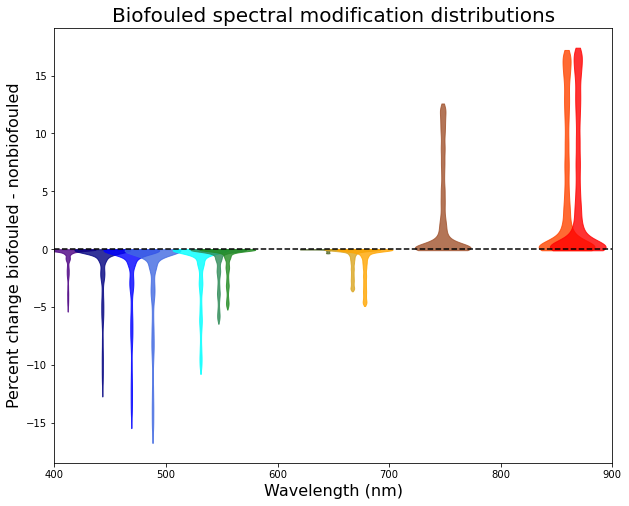

In [7]:

#median_meas=np.median(meas_BF,axis=0)

#this=(meas_BF-meas_NB) + median_meas
this=100*(meas_BF-meas_NB) / meas_BF

ls=20

waveln=waveln_BF

fig, ax = plt.subplots(1, 1,figsize=(10,8))

ax.violinplot(this, waveln,points=500,widths=50, showmeans=False,
               showextrema=False, showmedians=False)

ax.set_title('Biofouled spectral modification distributions',fontsize=ls)
ax.set_xlabel('Wavelength (nm)',fontsize=ls-4)
ax.set_ylabel('Percent change biofouled - nonbiofouled',fontsize=ls-4)
ax.set_xlim([400,900])

ax.plot([400,900],[0,0],'--',color='black')

colors = ['indigo','navy','blue','royalblue','cyan','seagreen','forestgreen',
         'darkolivegreen','goldenrod','orange','sienna','orangered',
         'red','maroon'] 


for i, violin in enumerate(ax.collections):
    violin.set_facecolor(colors[i])
    violin.set_color(colors[i])
    violin.set_edgecolor(colors[i])
    violin.set_alpha(0.8)

fig_filename = 'figures/SQOOP_Amir_v4/SQOOP_Amir_v4_BFmodification.pdf'
plt.savefig(fig_filename)


In [8]:
vars_name='data/SQOOP_Amir_biofoul.pkl'
f = open(vars_name, 'wb')
pickle.dump([meas_BF,meas_NB],f)
f.close()